<a href="https://colab.research.google.com/github/Ksenia-90/NN/blob/lesson_3/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Влияние функций активации на классификацию

# Домашнее задание

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [141]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [142]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.8.2
TensorFlow 2.0 Hello World


In [143]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [144]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns
from keras.layers import Dense, Dropout
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model
from keras.models import model_from_json
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [145]:
data_wine = load_wine()

In [146]:
data = data_wine['data']
target = data_wine['target']
target_names = data_wine['target_names'] 
hold = np.argwhere(target!=2).T[0]
data = data[hold]
target = target[hold]
target_names = target_names[0:1]


In [147]:
list(data_wine.target_names)

['class_0', 'class_1', 'class_2']

In [148]:
data_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [149]:
data_wine.data.shape, data_wine.target.shape

((178, 13), (178,))

In [150]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

In [151]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87, 13), (43, 13), (87,), (43,))

In [152]:
number_of_layers = 5
dropout_percentage = 0.25

model = Sequential()
model.add(Dense(units = 30, 
                   activation = 'relu', 
                   kernel_initializer = 'random_uniform', 
                   input_dim = (X_train.shape[1])))

for i in range(number_of_layers-1):
    model.add(Dense(units = 30, 
                       activation = 'relu', 
                       kernel_initializer = 'random_uniform',
                       input_dim = 30))
 
    model.add(Dropout(dropout_percentage))

model.add(Dense(units = 1, 
                   activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [153]:
model.summary() 

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 30)                420       
                                                                 
 dense_91 (Dense)            (None, 30)                930       
                                                                 
 dropout_47 (Dropout)        (None, 30)                0         
                                                                 
 dense_92 (Dense)            (None, 30)                930       
                                                                 
 dropout_48 (Dropout)        (None, 30)                0         
                                                                 
 dense_93 (Dense)            (None, 30)                930       
                                                                 
 dropout_49 (Dropout)        (None, 30)              

In [154]:
hist1=model.fit(X_train, y_train, epochs=150, batch_size = 20)


Epoch 1/150
5/5 [==============================] - 1s 5ms/step - loss: 0.6932 - binary_accuracy: 0.3908
Epoch 2/150
5/5 [==============================] - 0s 5ms/step - loss: 0.6910 - binary_accuracy: 0.5172
Epoch 3/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6882 - binary_accuracy: 0.6207
Epoch 4/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6846 - binary_accuracy: 0.5977
Epoch 5/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6705 - binary_accuracy: 0.4828
Epoch 6/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6626 - binary_accuracy: 0.4483
Epoch 7/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6391 - binary_accuracy: 0.4483
Epoch 8/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6354 - binary_accuracy: 0.4713
Epoch 9/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6298 - binary_accuracy: 0.4483
Epoch 10/150
5/5 [==============================] - 0s 4ms/step 

In [155]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy =", accuracy)

Accuracy = 0.9069767441860465


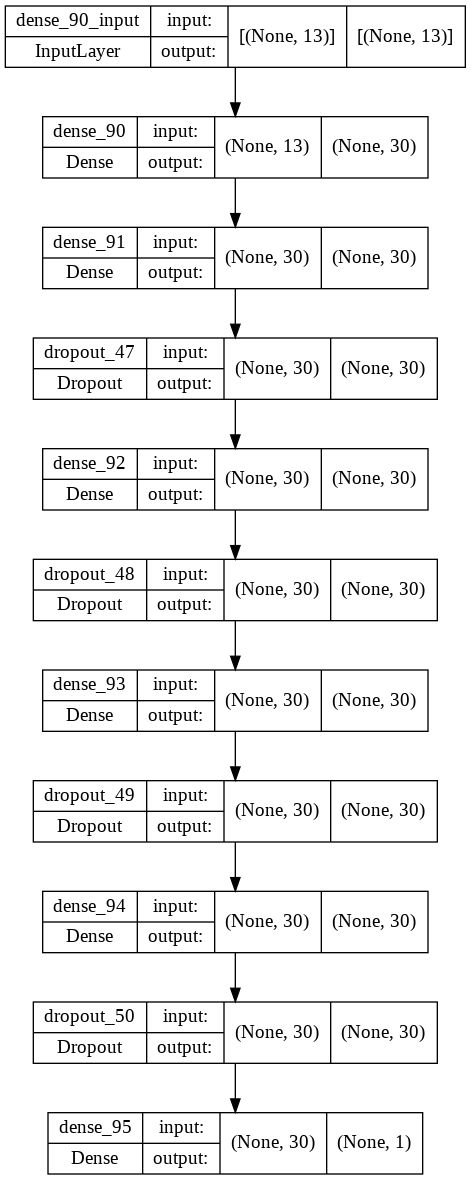

In [156]:
plot_model(model, to_file='model.png', show_shapes=True, 
           show_layer_names=True)